<h1 align="center">Project 3 - EDA - Data Exploring and Preparing For Model Run</h1>

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from nltk import pos_tag, word_tokenize
from nltk.stem import WordNetLemmatizer


# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### Read in Data

In [2]:
houston = pd.read_csv('data/df_Houston.csv')
austin = pd.read_csv('data/df_Austin.csv')

### Verify Data is read in okay

In [3]:
houston.head()
austin.head()

,subreddit,title,selftext,created_utc
0,Austin,Lost black and white tuxedo cat around Hancock...,Hello! Lord Byron is a large boy (about 14 pou...,1630954248
1,Austin,Are hospitals still super packed?,I feel like I have some kidney stone issues an...,1630953694
2,Austin,Moody Amphitheater GA Lawn,Any one who’s been to the concerts at the new ...,1630952987
3,Austin,New Uber user question,Probs is kinda more Uber-centric but it does i...,1630951790
4,Austin,Paddle board/kayak launch east of I-35 on sout...,I’m aware of the spots around Festival Beach b...,1630951786


In [47]:
houston.shape

(6044, 6)

In [ ]:
#Nulls were checked during the collection process (blanks were removed).  This does not check for other errors

### Start Exploring Data

#### Let's get an idea of post lengths

In [4]:
houston['text_length'] = houston['selftext'].str.len()
austin['text_length'] = austin['selftext'].str.len()

houston['text_word_count'] = houston['selftext'].str.split().str.len()
austin['text_word_count'] = austin['selftext'].str.split().str.len()

In [5]:
houston.head()

,subreddit,title,selftext,created_utc,text_length,text_word_count
0,houston,Want to build a stand alone apartment in backyard,Hello everyone. I want to build a stand alone ...,1630951521,640,122
1,houston,Relocating from Lex KY,Hi! Considering relocating from Lexington KY a...,1630948138,433,75
2,houston,Anywhere in Houston that can mount bindings to...,Just received some warranty replacement skis f...,1630943989,268,48
3,houston,Places to Study,Hi everyone! I just started school and I’m loo...,1630943452,197,35
4,houston,Where to buy fresh oysters( variety ),Well ass the tittle says is there anywhere in ...,1630941080,180,32


In [5]:
houston['text_word_count'].value_counts().sort_values(ascending=False).head()

26    450
11    301
21    300
25    300
53    152
Name: text_word_count, dtype: int64

In [7]:
austin['text_word_count'].value_counts().sort_values(ascending=False).head()

29    481
31    360
47    360
25    241
27    241
Name: text_word_count, dtype: int64

In [7]:
houston['text_word_count'].value_counts().sort_values().head()

57     1
122    1
108    1
30     1
48     1
Name: text_word_count, dtype: int64

In [9]:
austin['text_word_count'].value_counts().sort_values().head()

54     1
120    1
11     1
35     1
328    1
Name: text_word_count, dtype: int64

#### Look at Some Distribution of the Data

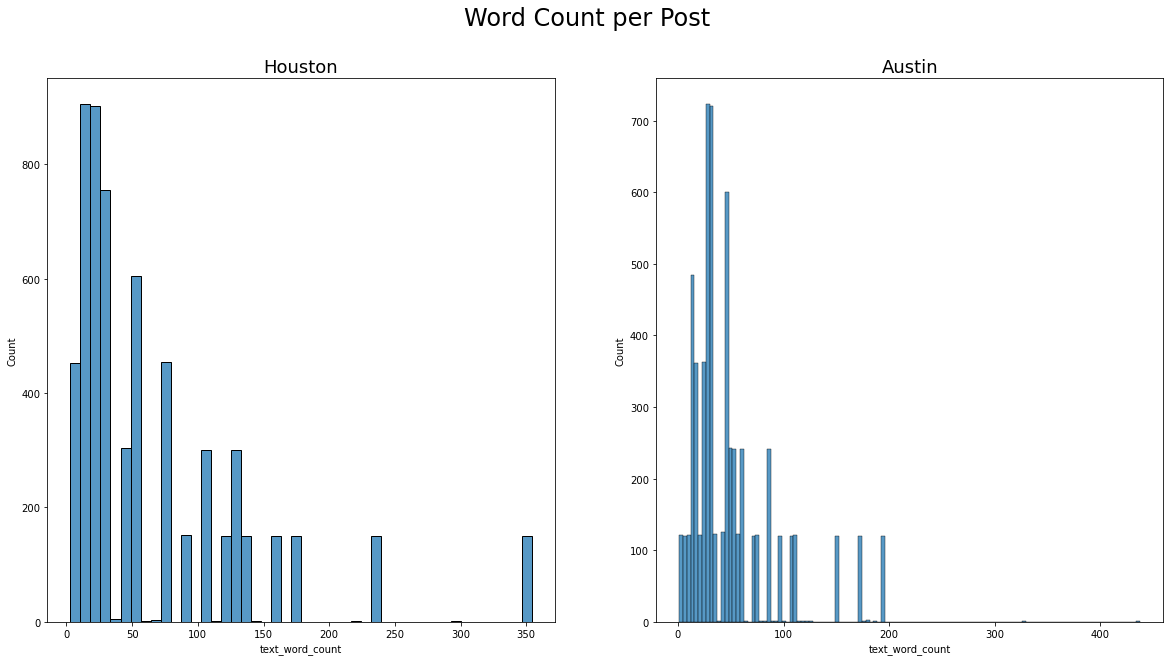

In [8]:
fig, axs = plt.subplots(1,2, figsize=(20,10))
sns.histplot(houston['text_word_count'], ax=axs[0])
sns.histplot(austin['text_word_count'], ax=axs[1])
axs[0].set_title('Houston', fontsize=18)
axs[1].set_title('Austin', fontsize=18)
fig.suptitle('Word Count per Post', fontsize=24);

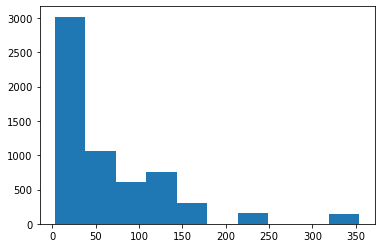

In [19]:
plt.hist(houston['text_word_count']);

#### Check if a few users are dominating the subreddit

### PreProcessing

- Remove special characters
- tokenize
- stop word removal(I'm leaving this in and dealing with it in the model section, so I can run one with stop words and one without)

In [6]:
cvec_h = CountVectorizer()
cvec_a = CountVectorizer()

In [19]:
X_houston = houston['selftext']
X_austin = austin['selftext']

In [8]:
cvec_h.fit(X_houston)
cvec_a.fit(X_austin)

CountVectorizer()

In [9]:
X_houston = cvec_h.transform(X_houston)
X_austin = cvec_a.transform(X_austin)

In [10]:
X_houston_df = pd.DataFrame(X_houston.todense(), columns=cvec_h.get_feature_names())
X_austin_df = pd.DataFrame(X_austin.todense(), columns=cvec_a.get_feature_names())

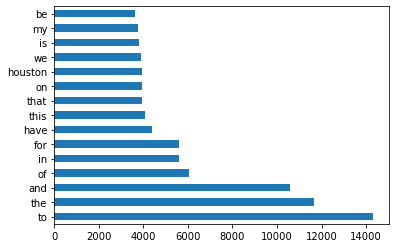

In [10]:
X_houston_df.sum().sort_values(ascending = False).head(15).plot(kind='barh');

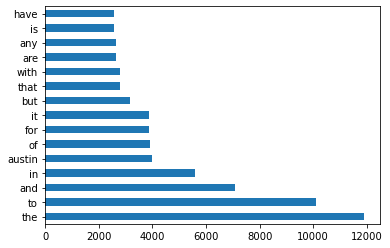

In [11]:
X_austin_df.sum().sort_values(ascending = False).head(15).plot(kind='barh');

#### Looks like I'll need to remove stop words

In [11]:
new_stop_words = list(CountVectorizer(stop_words='english').get_stop_words())

In [13]:
new_stop_words.append('austin')
new_stop_words.append('houston')

### re run model with stop words

In [17]:
cvec_h2 = CountVectorizer(stop_words=new_stop_words)
cvec_a2 = CountVectorizer(stop_words=new_stop_words)

In [ ]:
X_houston = houston['selftext']
X_austin = austin['selftext']

In [20]:
#if error need to re run X_houston assignment
cvec_h2.fit(X_houston)
cvec_a2.fit(X_austin)

CountVectorizer(stop_words=['whereupon', 'mine', 'thereupon', 'because', 'off',
                            'go', 'the', 'be', 'also', 'but', 'its', 'least',
                            'several', 'both', 'namely', 'why', 'against',
                            'nor', 'whenever', 'inc', 'thick', 'via', 'next',
                            'whoever', 'under', 'yours', 'over', 'own', 'ie',
                            'eg', ...])

In [21]:
X_houston2 = cvec_h2.transform(X_houston)
X_austin2 = cvec_a2.transform(X_austin)

In [22]:
X_houston_df2 = pd.DataFrame(X_houston2.todense(), columns=cvec_h2.get_feature_names())
X_austin_df2 = pd.DataFrame(X_austin2.todense(), columns=cvec_a2.get_feature_names())

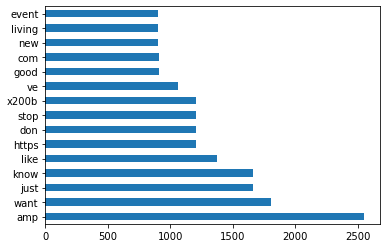

In [30]:
X_houston_df2.sum().sort_values(ascending = False).head(15).plot(kind='barh');

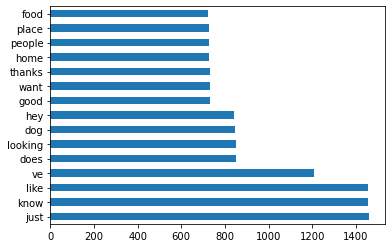

In [31]:
X_austin_df2.sum().sort_values(ascending = False).head(15).plot(kind='barh');

Need to do further cleaning.  jUst removing the ve and deleting the rows with web pages.  See below for started process of removing webpages if wanting to keep

In [7]:
houston.shape

(6044, 6)

# Text to remove

In [17]:
houston.drop(houston[houston['selftext'].str.contains('https')].index, inplace = True)
austin.drop(austin[austin['selftext'].str.contains('https')].index, inplace = True)

In [18]:

houston['selftext'] = houston['selftext'].str.replace('\n\n&amp;#x200B;', '')
houston['selftext'] = houston['selftext'].str.replace('\n', '')

austin['selftext'] = austin['selftext'].str.replace('\n\n&amp;#x200B;', '')
austin['selftext'] = austin['selftext'].str.replace('\n', '')

houston['selftext'] = houston['selftext'].str.replace("'", '')
austin['selftext'] = austin['selftext'].str.replace("'", '')


In [41]:
austin.shape

(5565, 6)

# Test some models to see top 20 words

Run different parameters to see top words.  This gives an indication if any of these words are key indicators of a city and need to be removed or some other insights.

In [26]:
#From Breakfast hour
cvec_h3 = CountVectorizer(stop_words=new_stop_words, ngram_range=(2,2), max_features=10000)
cvec_a3 = CountVectorizer(stop_words=new_stop_words,ngram_range=(2,2), max_features=10000)

In [77]:
#cvec_h3 = CountVectorizer(analyzer='word', token_pattern='([\'\w\.]+)', stop_words=new_stop_words)
#cvec_a3 = CountVectorizer(analyzer='word', token_pattern='([\'\w\.]+)',stop_words=new_stop_words)

#cvec_a3 = CountVectorizer(analyzer='word', token_pattern='[\S]+',stop_words=new_stop_words)

In [27]:
X_houston = houston['selftext']
X_austin = austin['selftext']

cvec_h3.fit(X_houston)
cvec_a3.fit(X_austin)

X_houston3 = cvec_h3.transform(X_houston)
X_austin3 = cvec_a3.transform(X_austin)

X_houston_df3 = pd.DataFrame(X_houston3.todense(), columns=cvec_h3.get_feature_names())
X_austin_df3 = pd.DataFrame(X_austin3.todense(), columns=cvec_a3.get_feature_names())

Text(0.5, 0.98, 'Top 20 words')

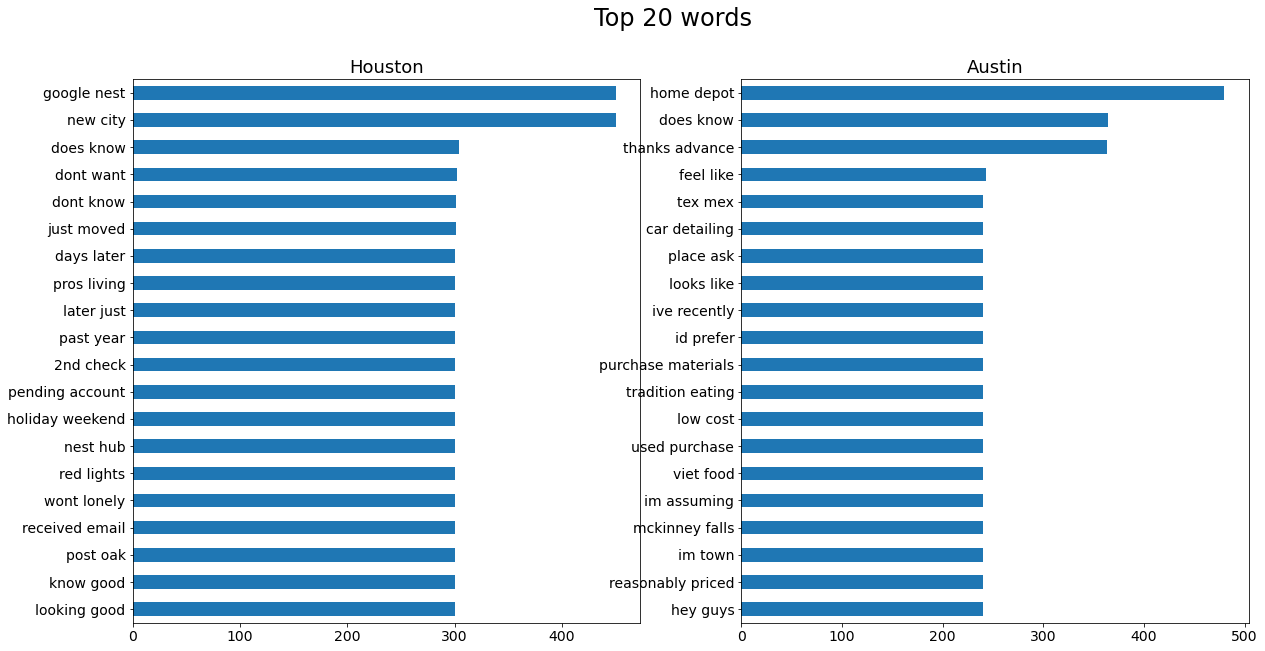

In [28]:
fig, ax = plt.subplots(1,2, figsize=(20,10))

X_houston_df3.sum().sort_values(ascending = False).head(20).plot(kind='barh', ax=ax[0], fontsize=14)
X_austin_df3.sum().sort_values(ascending = False).head(20).plot(kind='barh', ax=ax[1], fontsize=14);

ax[0].set_title('Houston', fontsize=18)
ax[1].set_title('Austin', fontsize=18)
ax[0].invert_yaxis()
ax[1].invert_yaxis()
fig.suptitle('Top 20 words', fontsize=24)

The code above uses ngram range 2,2 to look at word combinations

In [20]:
cvec_h3 = CountVectorizer(stop_words=new_stop_words)
cvec_a3 = CountVectorizer(stop_words=new_stop_words)

In [21]:
X_houston = houston['selftext']
X_austin = austin['selftext']

cvec_h3.fit(X_houston)
cvec_a3.fit(X_austin)

X_houston3 = cvec_h3.transform(X_houston)
X_austin3 = cvec_a3.transform(X_austin)

X_houston_df3 = pd.DataFrame(X_houston3.todense(), columns=cvec_h3.get_feature_names())
X_austin_df3 = pd.DataFrame(X_austin3.todense(), columns=cvec_a3.get_feature_names())

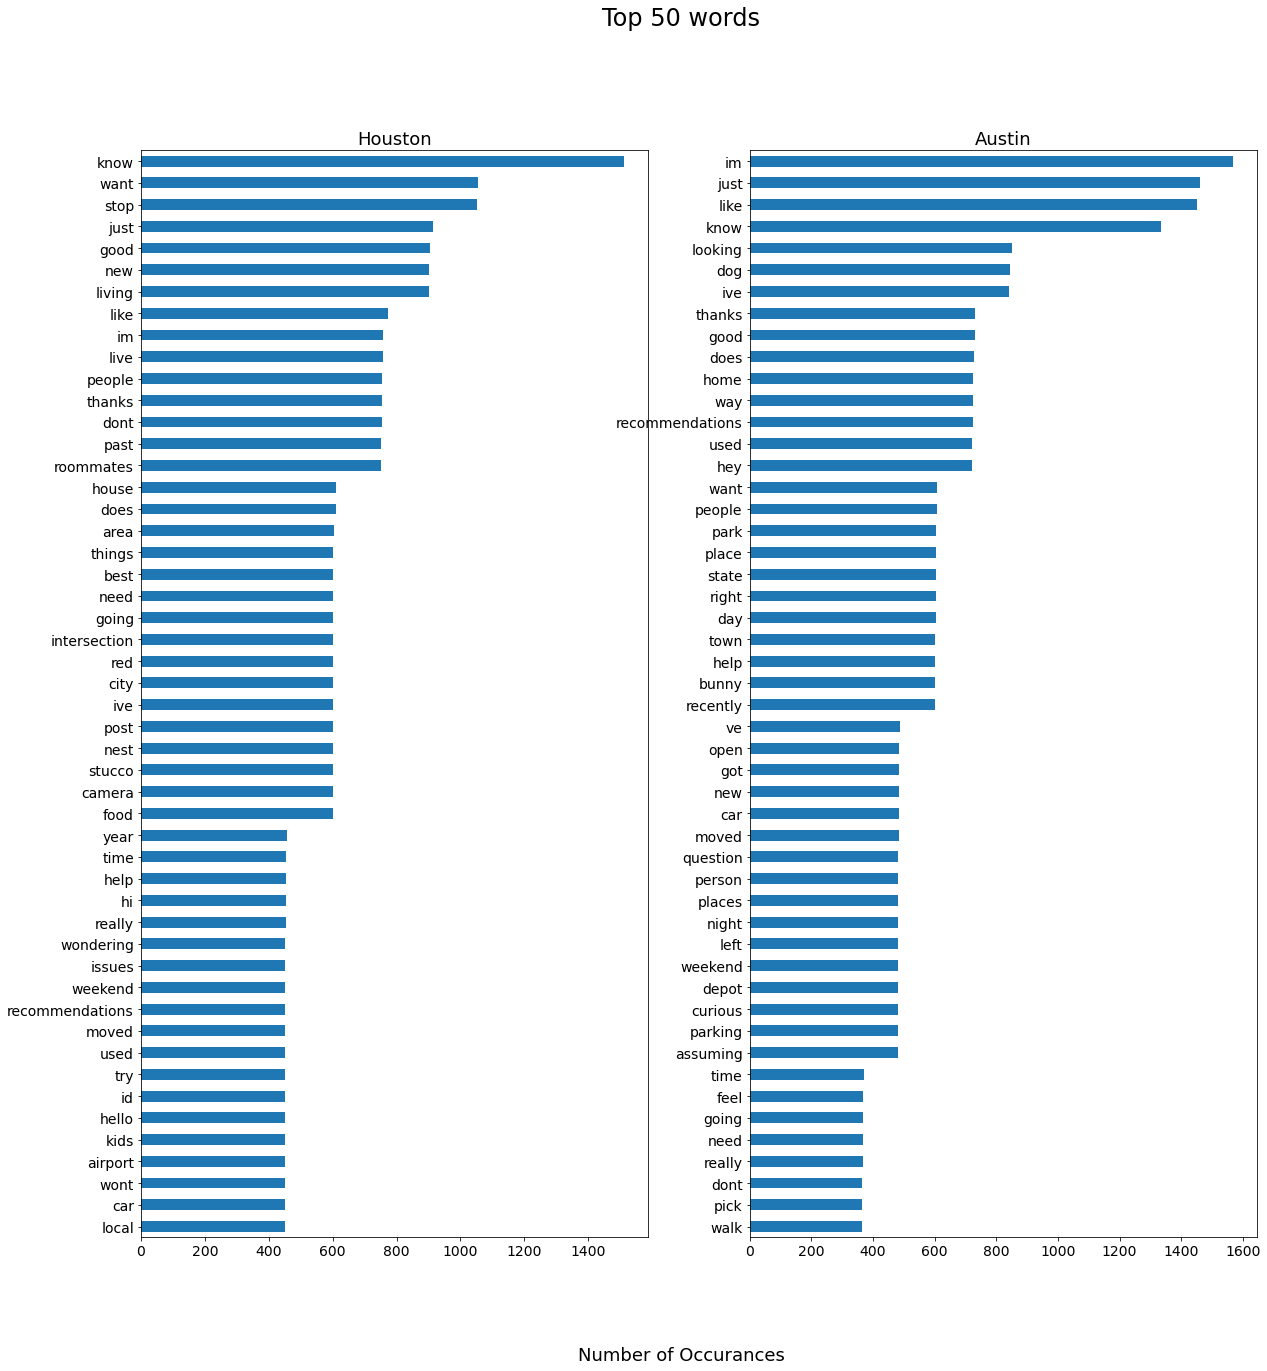

In [37]:
fig, ax = plt.subplots(1,2, figsize=(20,20))

X_houston_df3.sum().sort_values(ascending = False).head(50).plot(kind='barh', ax=ax[0], fontsize=14)
X_austin_df3.sum().sort_values(ascending = False).head(50).plot(kind='barh', ax=ax[1], fontsize=14);

ax[0].set_title('Houston', fontsize=18)
ax[1].set_title('Austin', fontsize=18)
ax[0].invert_yaxis()
ax[1].invert_yaxis()
fig.suptitle('Top 50 words', fontsize=24)
fig.text(0.5, 0.04, 'Number of Occurances', ha='center', fontsize=18);

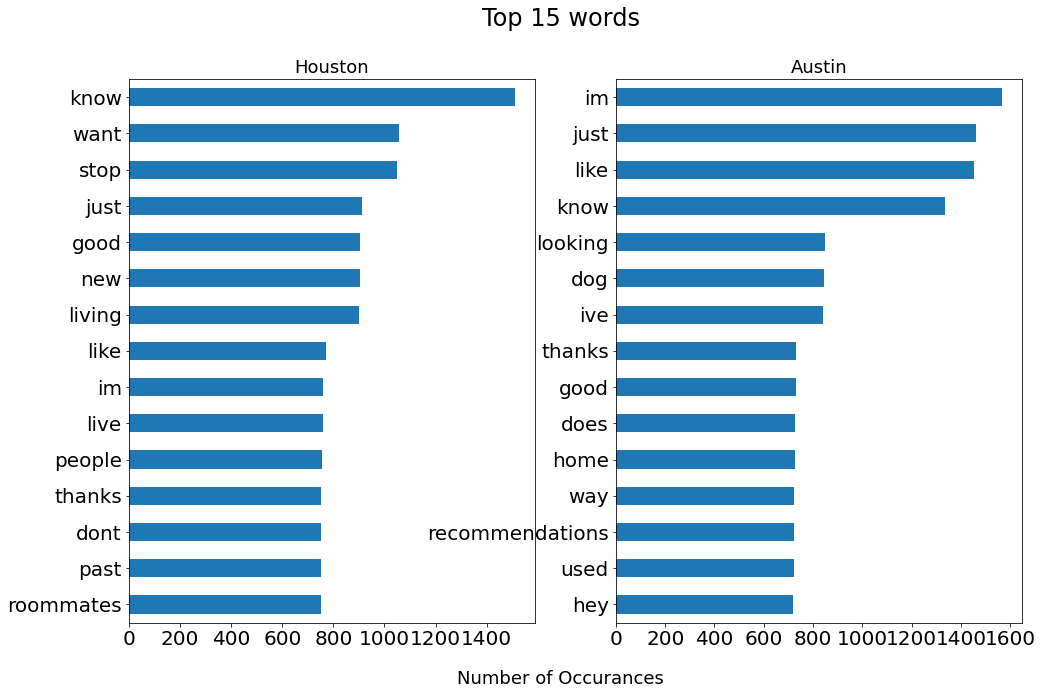

In [33]:
fig, ax = plt.subplots(1,2, figsize=(16,10))

X_houston_df3.sum().sort_values(ascending = False).head(15).plot(kind='barh', ax=ax[0], fontsize=20)
X_austin_df3.sum().sort_values(ascending = False).head(15).plot(kind='barh', ax=ax[1], fontsize=20);

ax[0].set_title('Houston', fontsize=18)
ax[1].set_title('Austin', fontsize=18)
ax[0].invert_yaxis()
ax[1].invert_yaxis()
fig.suptitle('Top 15 words', fontsize=24)
fig.text(0.5, 0.04, 'Number of Occurances', ha='center', fontsize=18);

In [26]:
houston15 = list(X_houston_df3.sum().sort_values(ascending = False).head(15).index)
austin15 = list(X_austin_df3.sum().sort_values(ascending = False).head(15).index)

Look at the unique words and words that are the same

In [27]:
#Words in both lists
for word in houston15:
    if word in austin15:
        print(word)

know
just
good
like
im
thanks


In [28]:
#words in Houston but not in Austin list
for word in houston15:
    if word not in austin15:
        print(word)

want
stop
new
living
live
people
dont
past
roommates


In [31]:
#Words in Austin and not in Houston list
for word in austin15:
    if word not in houston15:
        print(word)

looking
dog
ive
does
home
way
recommendations
used
hey


Investigate some top words if they look funny

# Output

### Add a classifier column

In [43]:
houston['classifier'] = 0
austin['classifier'] = 1

### Combine the two dataframes

In [44]:
city_comp = pd.concat([houston, austin], ignore_index= True)

In [45]:
city_comp.head()

,subreddit,title,selftext,created_utc,text_length,text_word_count,classifier
0,houston,Want to build a stand alone apartment in backyard,Hello everyone. I want to build a stand alone ...,1630951521,640,122,0
1,houston,Relocating from Lex KY,Hi! Considering relocating from Lexington KY a...,1630948138,433,75,0
2,houston,Anywhere in Houston that can mount bindings to...,Just received some warranty replacement skis f...,1630943989,268,48,0
3,houston,Places to Study,Hi everyone! I just started school and I’m loo...,1630943452,197,35,0
4,houston,Where to buy fresh oysters( variety ),Well ass the tittle says is there anywhere in ...,1630941080,180,32,0


In [46]:
city_comp.shape

(11006, 7)

# Output cleaned CSV

In [47]:
city_comp.to_csv('data/city_comp.csv', index=False)